# Overview of this jupyter notebook

1. Concatenate single dataframes of each classes into one dataframe
2. Plot representative curve of each classes
3. Create feature (input data) by converting the dataframe into an array
4. Create label
5. Save feature and label

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [7]:
import os
import json
import random
import pickle
import importlib
from library import etl_data as etl            # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
from library import classification_util as cu  # this module contains helper functions for the classification task
print(importlib.reload(etl))
print(importlib.reload(fapsc))
print(importlib.reload(cu))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>
<module 'library.classification_util' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\classification_util.py'>


## 1. Concatenate single dataframes of each classes into one dataframe

In [4]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [5]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [6]:
df0 = pd.read_pickle("dataframes/df0_v4.1.pkl")
df1 = pd.read_pickle("dataframes/df1_v4.1.pkl")
df2 = pd.read_pickle("dataframes/df2_v4.1.pkl")
df3 = pd.read_pickle("dataframes/df3_v4.1.pkl")
df4 = pd.read_pickle("dataframes/df4_v4.1.pkl")
df5 = pd.read_pickle("dataframes/df5_v4.1.pkl")
df6 = pd.read_pickle("dataframes/df6_v4.1.pkl")
df7 = pd.read_pickle("dataframes/df7_v4.1.pkl")

In [6]:
df0.shape

(775, 800)

In [7]:
# reduce number of curves from class 0: 800 -> 200
# so that every class has 200 curves each for the classification

df0 = df0[df0.columns[:200]]
df0.shape

(775, 200)

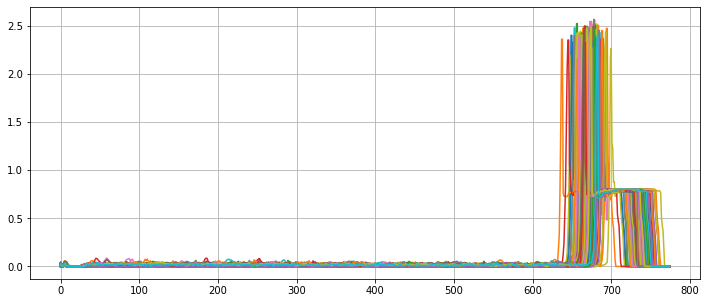

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df0)
plt.grid()
plt.show()

In [9]:
print(len(df0), len(df1), len(df2),len(df3), len(df4), len(df5), len(df6), len(df7))

775 931 812 697 803 766 743 748


In [10]:
df_single = [df0, df1, df2, df3, df4, df5, df6, df7]
tot_nr_curves = []

for i in range(len(df_single)):
    print(f"df{i} number of curves: {len(df_single[i].columns)}")
    tot_nr_curves.append(len(df_single[i].columns))
    
print(f"tot_nr_curves: {sum(tot_nr_curves)}")

df0 number of curves: 200
df1 number of curves: 200
df2 number of curves: 200
df3 number of curves: 200
df4 number of curves: 200
df5 number of curves: 200
df6 number of curves: 200
df7 number of curves: 200
tot_nr_curves: 1600


In [11]:
tot_nr_curves

[200, 200, 200, 200, 200, 200, 200, 200]

In [12]:
class_sector = [0]

for i in tot_nr_curves:
    class_sector.append(class_sector[-1] + i)

In [13]:
# class_sector is important for the labeling

class_sector

[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]

In [14]:
with open("dataframes/class_sector_single_v4.1.txt", "wb") as f:   
    pickle.dump(class_sector, f)

In [15]:
df = etl.concat_df(df_single, shift_curves=False)
df = df.iloc[:920]
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.00000,0.00000,0.01792,0.01792,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.00000,0.00000,0.01792,0.01344,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00896,0.00448,0.00896,0.01792,0.00896,0.01792,0.00448,0.01792
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00896,0.00896,0.00448,0.00000,0.00896,0.00896,0.01344,0.01344,0.01344,0.00896
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.01344,0.01792,0.00896,0.00448,0.01344,0.01792,0.01344,0.01792,0.01344,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


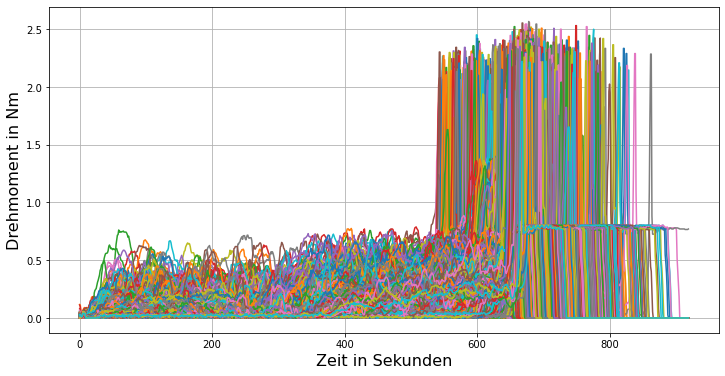

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df)   # 920*20 = 18400  -> 20 is downsample ratio
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.grid()
plt.show()

## 2. Plot representative curve of each classes

In [46]:
def plot_representative_curves(df, class_sector, classes):

    plt.figure(figsize=(12,6), dpi=70)
    #plt.xlabel("Zeit in Sekunden", fontsize=16)
    #plt.ylabel("Drehmoment in Nm", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    linewidth = 3

    plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+2]], fapsc.yellow, label=classes[2], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+3]], fapsc.orange, label=classes[3], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+9]], fapsc.blue, label=classes[4], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+1]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+100]], fapsc.red, label=classes[6], linewidth=linewidth)
    plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+4]], fapsc.black, label=classes[7], linewidth=linewidth)

    leg = plt.legend(loc='upper left', fontsize=18)
    for line in leg.get_lines():
        line.set_linewidth(8)
    plt.grid(color=fapsc.grey_3, linestyle='-')
    plt.show()

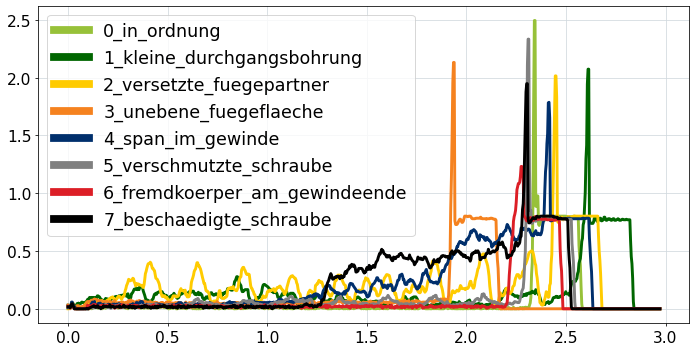

In [47]:
plot_representative_curves(df, class_sector, classes)

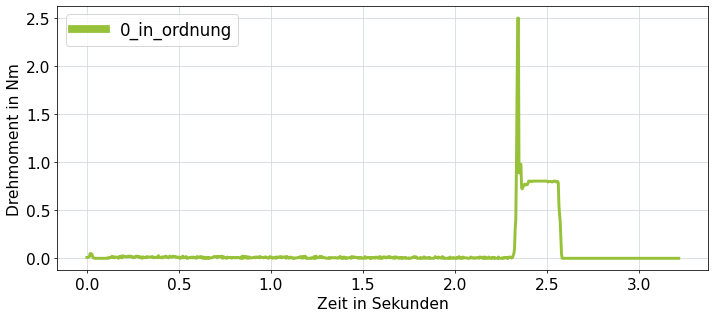

In [76]:
plt.figure(figsize=(12,5), dpi=70)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize="xx-large")
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

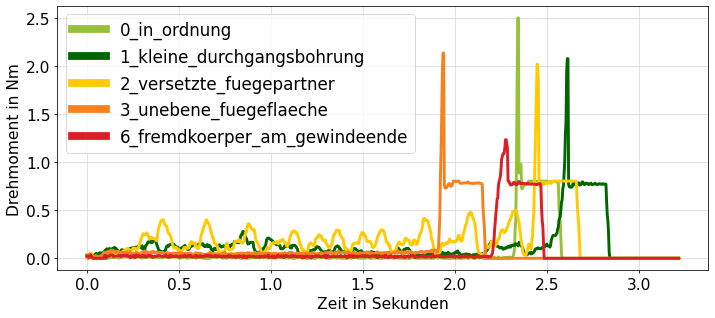

In [66]:
plt.figure(figsize=(12,5), dpi=70)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+2]], fapsc.yellow, label=classes[2], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+3]], fapsc.orange, label=classes[3], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+9]], fapsc.blue, label=classes[4], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+1]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+100]], fapsc.red, label=classes[6], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+4]], fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize="xx-large")
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

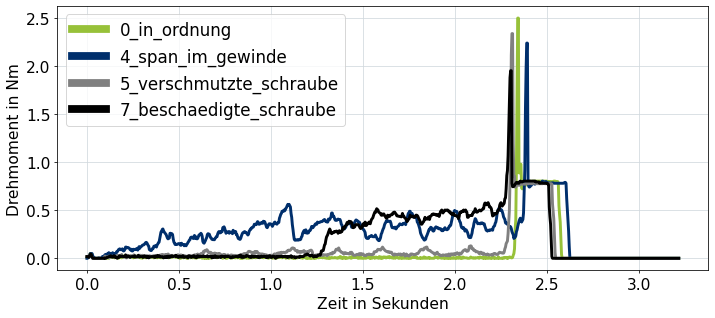

In [75]:
plt.figure(figsize=(12,5), dpi=70)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+2]], fapsc.yellow, label=classes[2], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+3]], fapsc.orange, label=classes[3], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+180]], fapsc.blue, label=classes[4], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+1]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+100]], fapsc.red, label=classes[6], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+4]], fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize="xx-large")
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

## 3. Create feature (input data) by converting the dataframe into an array

In [29]:
df.values.shape

(920, 1600)

In [30]:
feature = df.values.transpose()
feature.shape

(1600, 920)

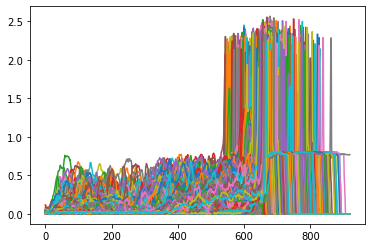

In [31]:
plt.figure()
plt.plot(feature.transpose())
plt.show()

## 4. Create label

In [32]:
class_sector

[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]

In [33]:
label = []

for i in range(len(classes)):
    if i == 0:
        for j in range(class_sector[0], class_sector[1]):
            label.append(i)
    elif i == 1:
        for j in range(class_sector[1], class_sector[2]):
            label.append(i)
    elif i == 2:
        for j in range(class_sector[2], class_sector[3]):
            label.append(i)
    elif i == 3:
        for j in range(class_sector[3], class_sector[4]):
            label.append(i)
    elif i == 4:
        for j in range(class_sector[4], class_sector[5]):
            label.append(i)
    elif i == 5:
        for j in range(class_sector[5], class_sector[6]):
            label.append(i)
    elif i == 6:
        for j in range(class_sector[6], class_sector[7]):
            label.append(i)
    elif i == 7:
        for j in range(class_sector[7], class_sector[8]):
            label.append(i)

print(len(label))    

1600


In [34]:
labels_check = [label.count(x) for x in range(len(classes))]
labels_check

[200, 200, 200, 200, 200, 200, 200, 200]

In [35]:
tot_nr_curves == labels_check

True

In [36]:
label = np.array(label)
label

array([0, 0, 0, ..., 7, 7, 7])

In [37]:
for i in range(8):
    print(label[class_sector[i]:class_sector[i+1]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

## 5. Save feature and label

In [38]:
np.save('feature_label/feature_single_v4.1.npy', feature)

In [39]:
np.save("feature_label/label_single_v4.1.npy", label)